## 1. Install Required Packages and libraries

In [ ]:
!pip install -U ipywidgets
!pip install ultralytics

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #functions for interacting with the operating system

from matplotlib import pyplot as plt
from PIL import Image #opening, manipulating, and saving image files.

import torch
from torch import nn


from ultralytics import YOLO

## 2. Load a Pre-trained YOLO Model

In [ ]:
# code to load the medium weights
model = YOLO('yolov8m.pt')

## 3. Download Dataset from Roboflow:

In [ ]:
#integrates with Roboflow to access and download a specific dataset version for a project related to self-driving cars.

!pip install roboflow

from roboflow import Roboflow #Roboflow API
rf = Roboflow(api_key="GdpQ6ES68AVPdEDR3MQs") #initialize the Roboflow API with the API key
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov5pytorch:: 100%|██████████| 9950/9950 [00:01<00:00, 7798.74it/s]


## 4. Training the YOLOv5 Model:

In [ ]:
results = model.train(data='/content/Self-Driving-Cars-6/data.yaml', epochs=50, imgsz=640)

Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Self-Driving-Cars-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 124MB/s]


AMP: checks passed ✅


train: Scanning /content/Self-Driving-Cars-6/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 1908.28it/s]

train: New cache created: /content/Self-Driving-Cars-6/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Self-Driving-Cars-6/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 945.03it/s]


val: New cache created: /content/Self-Driving-Cars-6/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.19G     0.8306      2.442      1.169         26        640: 100%|██████████| 221/221 [02:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]

                   all        801        944      0.317      0.538      0.388        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.02G     0.7711      1.641      1.112         19        640: 100%|██████████| 221/221 [01:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]

                   all        801        944      0.502      0.536      0.526      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.01G     0.7849      1.466      1.116         17        640: 100%|██████████| 221/221 [01:58<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]

                   all        801        944      0.724      0.598      0.636      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.11G     0.7597       1.31      1.099         12        640: 100%|██████████| 221/221 [01:58<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]

                   all        801        944      0.683      0.624      0.704      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.11G     0.7307      1.177      1.079         18        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all        801        944      0.776      0.728      0.789      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.01G     0.7129      1.074      1.077         21        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        801        944      0.856       0.73       0.82      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       7.1G     0.7018      1.035      1.064         22        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]

                   all        801        944      0.878       0.76      0.841        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       7.1G     0.6775     0.9498      1.048         15        640: 100%|██████████| 221/221 [01:57<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]

                   all        801        944       0.89      0.795      0.867      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       7.1G     0.6626     0.9289      1.048         22        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]

                   all        801        944      0.914      0.769      0.869      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.01G     0.6544     0.8847      1.038         25        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]

                   all        801        944      0.926      0.815      0.898       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.12G     0.6491     0.8364      1.032         20        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]

                   all        801        944      0.918      0.832      0.907       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       7.1G     0.6485     0.8381      1.034         28        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        801        944      0.907      0.844      0.913      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.09G     0.6348     0.7848      1.027         29        640: 100%|██████████| 221/221 [01:58<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]

                   all        801        944      0.949      0.816      0.913      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.01G     0.6203     0.7722      1.019         26        640: 100%|██████████| 221/221 [01:57<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.00it/s]

                   all        801        944      0.925      0.876      0.936       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.11G     0.6162      0.746      1.014         21        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]

                   all        801        944      0.956      0.848       0.93      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.11G     0.6086     0.7326      1.016         23        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]

                   all        801        944      0.917      0.853      0.919      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.11G     0.6021     0.7116      1.011         25        640: 100%|██████████| 221/221 [01:57<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        801        944      0.928      0.877      0.939      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.01G     0.6019     0.6985      1.008         27        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]

                   all        801        944      0.937      0.886      0.936      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       7.1G     0.5887      0.678      1.002         27        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]

                   all        801        944      0.936       0.88      0.946      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.11G     0.5753     0.6725     0.9978         26        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]


                   all        801        944      0.944      0.884      0.951       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       7.1G     0.5825     0.6713     0.9996         18        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]

                   all        801        944       0.93      0.886      0.949      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.01G     0.5769     0.6509     0.9954         16        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]

                   all        801        944      0.941      0.898      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.11G     0.5755      0.648      0.999         29        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]

                   all        801        944      0.929      0.897      0.951      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.11G     0.5771     0.6375      0.994         24        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]

                   all        801        944       0.95      0.905      0.961      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       7.1G     0.5623     0.6203     0.9935         29        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        801        944      0.943      0.913       0.96      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.01G     0.5651     0.6092     0.9883         24        640: 100%|██████████| 221/221 [01:57<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]

                   all        801        944      0.938      0.912      0.959       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.11G     0.5526     0.5966     0.9863         24        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]

                   all        801        944      0.948      0.906      0.959      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.11G     0.5543     0.5995     0.9842         26        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]

                   all        801        944      0.915      0.914      0.957      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       7.1G     0.5458     0.5821     0.9841         24        640: 100%|██████████| 221/221 [01:57<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        801        944      0.959      0.915      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.01G     0.5356     0.5648     0.9738         25        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]

                   all        801        944      0.952      0.925      0.965      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.11G     0.5441      0.565     0.9785         28        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]

                   all        801        944      0.947      0.907      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.12G     0.5269     0.5552     0.9701         28        640: 100%|██████████| 221/221 [01:57<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]

                   all        801        944      0.958      0.936      0.968      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       7.1G     0.5272     0.5553     0.9724         24        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]

                   all        801        944      0.948       0.93      0.967      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.01G     0.5151     0.5252     0.9664         24        640: 100%|██████████| 221/221 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        801        944      0.966      0.931      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       7.1G      0.519     0.5266      0.968         17        640: 100%|██████████| 221/221 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]

                   all        801        944       0.96      0.922      0.966      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.11G     0.5175      0.527     0.9659         17        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]

                   all        801        944      0.959      0.947      0.969       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       7.1G     0.5199     0.5101     0.9684         19        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all        801        944      0.955      0.933      0.969      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.01G     0.5078     0.4941     0.9582         24        640: 100%|██████████| 221/221 [01:58<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]

                   all        801        944      0.971      0.932       0.97      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.11G     0.4949     0.5004     0.9611         22        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        801        944       0.96      0.934      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       7.1G     0.5043     0.4989     0.9651         17        640: 100%|██████████| 221/221 [01:57<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]

                   all        801        944       0.96      0.934      0.967      0.839


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       7.1G     0.4998     0.2976      0.932         13        640: 100%|██████████| 221/221 [01:58<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all        801        944      0.957      0.937      0.968      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.01G     0.4918     0.2883     0.9264         14        640: 100%|██████████| 221/221 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]

                   all        801        944      0.964      0.936      0.969      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.11G     0.4809     0.2811     0.9193         11        640: 100%|██████████| 221/221 [01:56<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]

                   all        801        944      0.953      0.947      0.969      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.11G     0.4827     0.2748     0.9208         10        640: 100%|██████████| 221/221 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]

                   all        801        944      0.961       0.94       0.97      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.11G     0.4707      0.269      0.915         12        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]

                   all        801        944      0.965      0.948      0.971      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.01G     0.4644     0.2639     0.9125         10        640: 100%|██████████| 221/221 [01:57<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all        801        944      0.961      0.943      0.971      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       7.1G     0.4624     0.2612     0.9109         13        640: 100%|██████████| 221/221 [01:56<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all        801        944      0.963      0.938      0.971      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       7.1G     0.4601     0.2571     0.9063         14        640: 100%|██████████| 221/221 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all        801        944      0.957      0.951      0.972      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       7.1G     0.4498     0.2454      0.905         15        640: 100%|██████████| 221/221 [01:56<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]

                   all        801        944      0.957      0.947      0.972      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.01G     0.4443     0.2447     0.8966         14        640: 100%|██████████| 221/221 [01:57<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]

                   all        801        944      0.965      0.944      0.972      0.851



50 epochs completed in 1.894 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        801        944      0.959       0.95      0.972      0.851
           Green Light         87        122       0.86      0.805      0.877      0.546
             Red Light         74        108      0.824      0.787      0.821      0.544
       Speed Limit 100         52         52      0.976          1      0.995      0.918
       Speed Limit 110         17         17          1      0.999      0.995      0.909
       Speed Limit 120         60         60      0.993          1      0.995      0.936
        Speed Limit 20         56         56      0.978      0.982      0.987      0.858
        Speed Limit 30         71         74      0.956      0.973      0.992      0.923
        Speed Limit 40         53         55      0.967      0.982       0.99      0.893
        Speed Limit 50         68         71      0.963      0.944      0.991      0.896
        Speed Limit 60         76         76      0.986      0.949      0.985      0.907
        Speed Limit 7

## 5. Validating the Model:

In [ ]:
metrics = model.val() #method will run the validation process and return various metrics.

Ultralytics YOLOv8.2.61 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Self-Driving-Cars-6/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:22<00:00,  2.25it/s]


                   all        801        944      0.958      0.951      0.972      0.851
           Green Light         87        122      0.869      0.819       0.88      0.547
             Red Light         74        108      0.822      0.787      0.816      0.548
       Speed Limit 100         52         52      0.975          1      0.995      0.922
       Speed Limit 110         17         17      0.999          1      0.995      0.909
       Speed Limit 120         60         60      0.993          1      0.995      0.939
        Speed Limit 20         56         56      0.977      0.982      0.987      0.851
        Speed Limit 30         71         74      0.948      0.973      0.992      0.924
        Speed Limit 40         53         55      0.966      0.982       0.99      0.895
        Speed Limit 50         68         71       0.96      0.944      0.991      0.893
        Speed Limit 60         76         76      0.986       0.95      0.985      0.911
        Speed Limit 7

## 6. Display Metric Images:

In [ ]:
#some common evaluation metrics visualizations and result images generated by YOLOv5 during the validation process. These images provide insights into the model's performance in terms of precision, recall, confusion matrix, F1 score, and overall results.

list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png", "F1_curve.png", "results.png"]

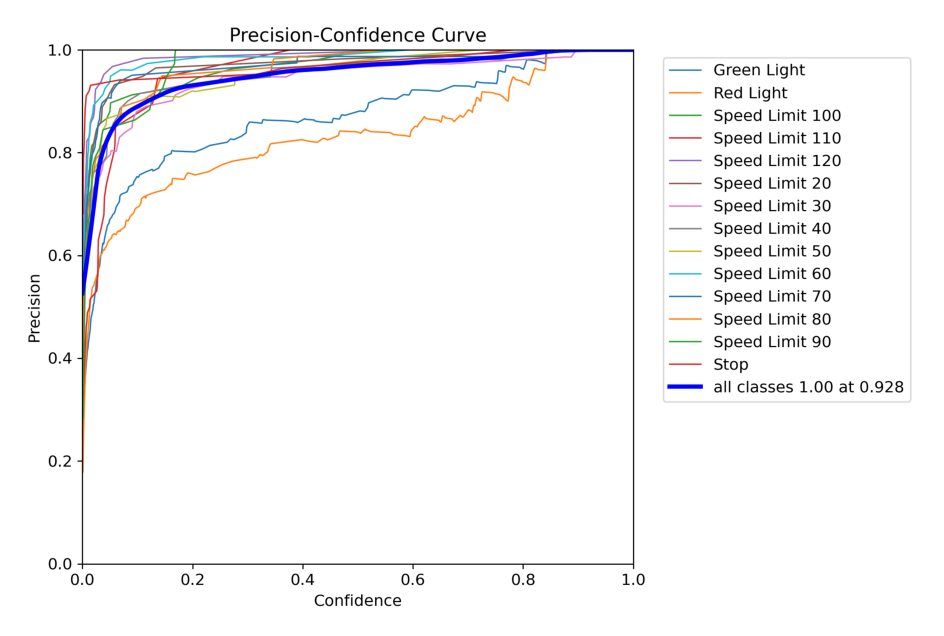

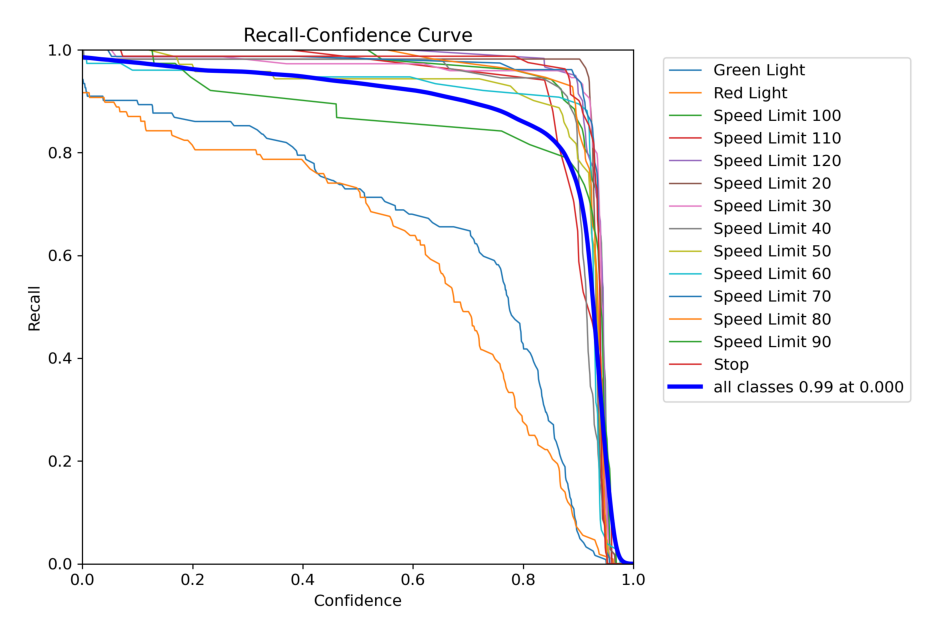

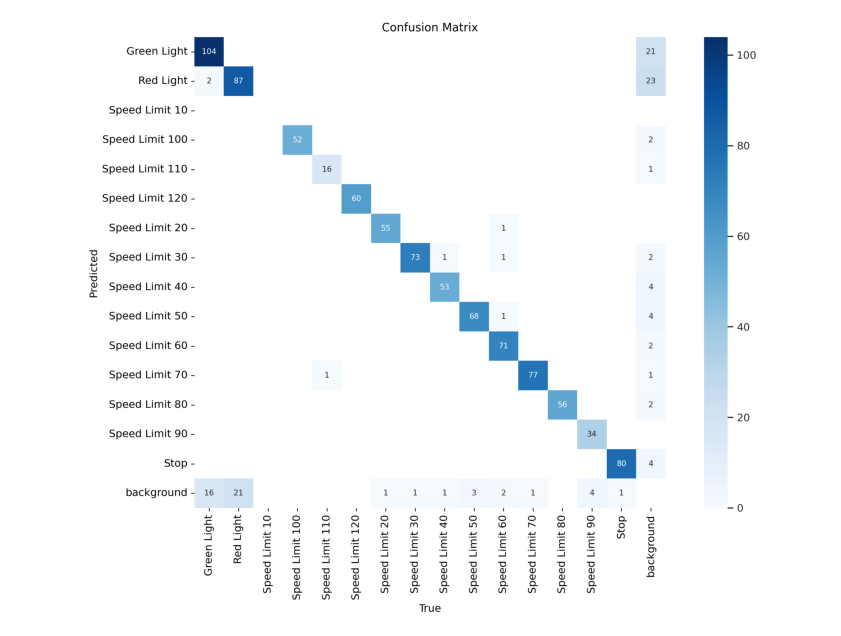

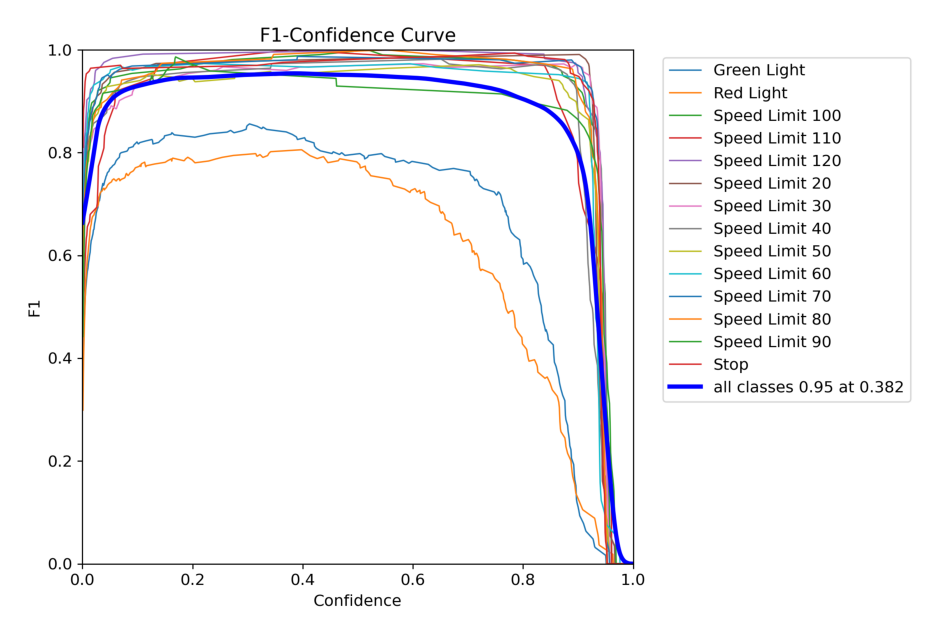

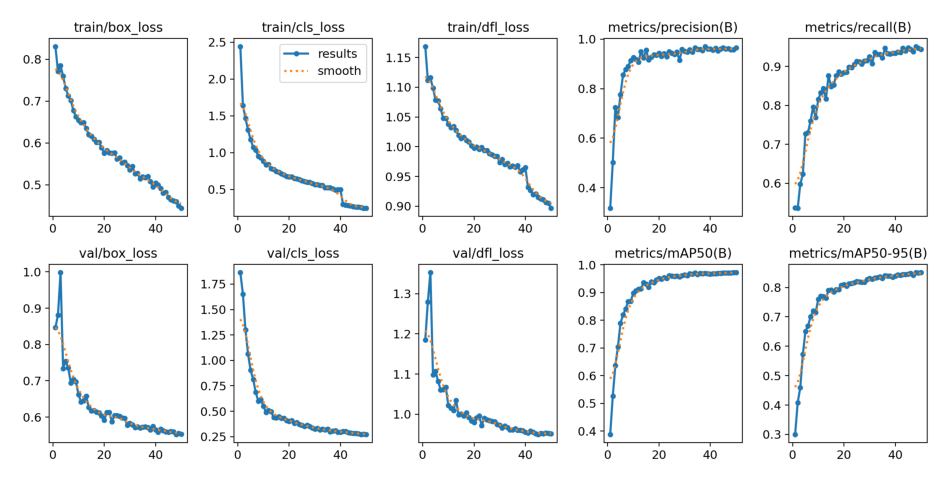

In [ ]:
#displaying the metric images

from PIL import Image
import matplotlib.pyplot as plt

for i in list_of_metrics:
  image = Image.open(f'/content/runs/detect/train/{i}')
  plt.figure(figsize=(12, 8))
  plt.axis("off")
  plt.imshow(image)
  plt.show()

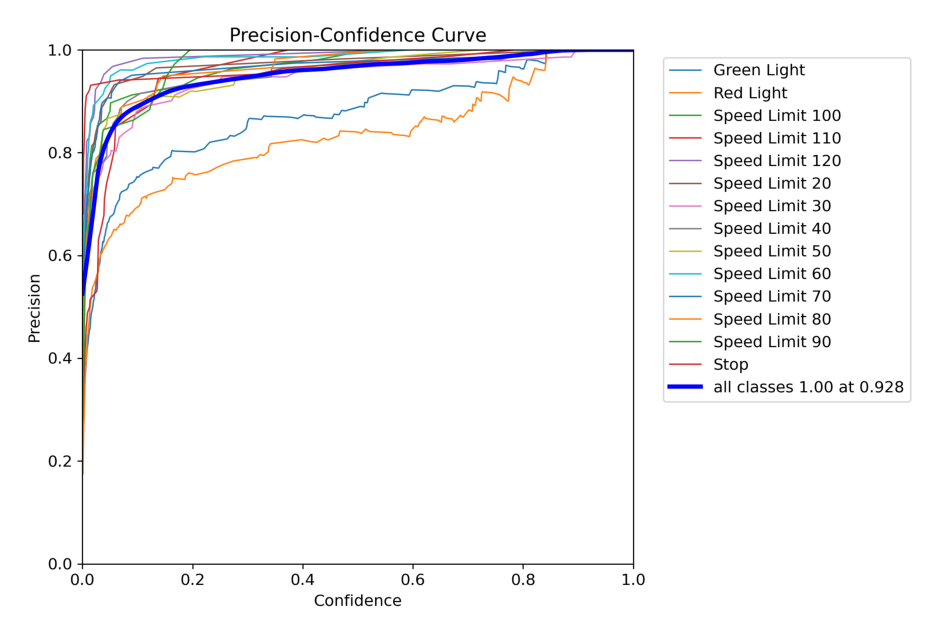

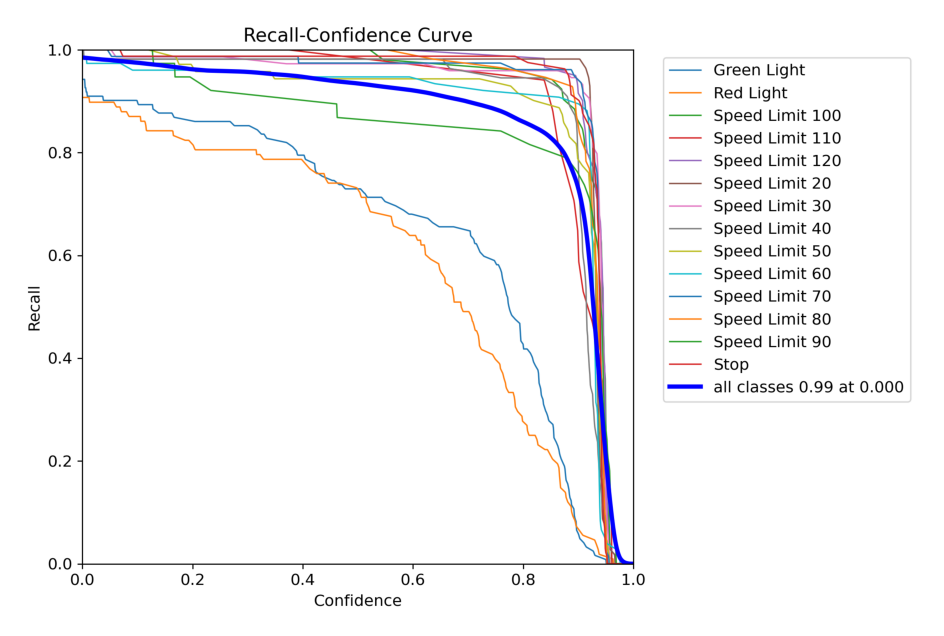

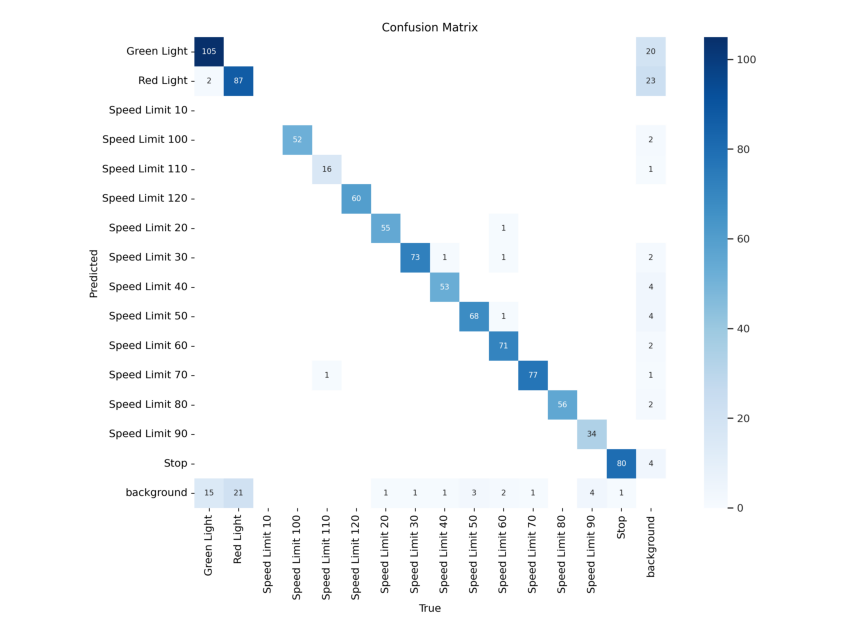

In [ ]:
list_of_eval_metrics = list_of_metrics[:-2]
for i in list_of_eval_metrics:
  image = Image.open(f'/content/runs/detect/train2/{i}')

  plt.figure(figsize=(12, 8))
  plt.axis("off")
  plt.imshow(image)
  plt.show()

## 7. Detection Pipeline Function:

In [ ]:
#takes in a list of images, runs the detection model on them, and then displays the results using Matplotlib.

def detection_pipline(images):
    output = model(images)

    # Visualize the results
    for i, r in enumerate(output):
        # Plot results image
        im_bgr = r.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()

## 8. Usage Example for Detection Pipeline

In [ ]:
test_imgs = [
    "/content/Self-Driving-Cars-6/test/images/road596_png.rf.11f43967e3d8f54a7c94b5810f527f23.jpg"
]


0: 640x640 1 Speed Limit 80, 36.5ms
Speed: 3.1ms preprocess, 36.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


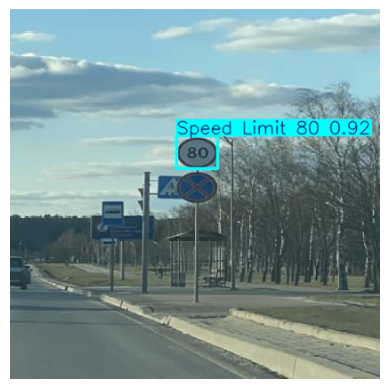

In [ ]:
detection_pipline(test_imgs)